In [32]:
import keras
from keras.datasets import cifar10

(X_train, y_train_class), (X_test, y_test_class) = cifar10.load_data()
print(f'x_train shape: {X_train.shape}')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class to class vector
num_classes = 10
y_train = keras.utils.to_categorical(y_train_class, num_classes)
y_test = keras.utils.to_categorical(y_test_class, num_classes)
print(f'y_train shape: {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


truck


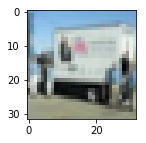

horse


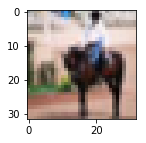

horse


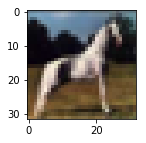

ship


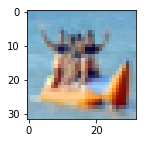

In [33]:
import keras
import matplotlib.pyplot as plt
import random

NAMES = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

num_classes = 10

for i in random.sample(range(1,100), 4):
    print(NAMES[int(y_train_class[i])])
    plt.figure(figsize = (2, 2))
    plt.imshow(X_train[i])
    plt.show()

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax'),
])

Using TensorFlow backend.


NameError: name 'x_train' is not defined

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 267s 5ms/step - loss: 1.5986 - acc: 0.4243 - val_loss: 1.2504 - val_acc: 0.5612
Epoch 2/5
50000/50000 [==============================] - 270s 5ms/step - loss: 1.2422 - acc: 0.5647 - val_loss: 1.2664 - val_acc: 0.5895
Epoch 3/5
50000/50000 [==============================] - 267s 5ms/step - loss: 1.1375 - acc: 0.6103 - val_loss: 1.0228 - val_acc: 0.6574
Epoch 4/5
50000/50000 [==============================] - 267s 5ms/step - loss: 1.1045 - acc: 0.6285 - val_loss: 0.9961 - val_acc: 0.6598
Epoch 5/5
50000/50000 [==============================] - 265s 5ms/step - loss: 1.1030 - acc: 0.6307 - val_loss: 1.0639 - val_acc: 0.6367


In [38]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 1.0638933925628662
Test accuracy: 0.6367


In [0]:
y_pred = model.predict(X_test)

Predicted: frog
Correct: ship


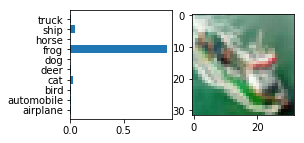

Predicted: frog
Correct: frog


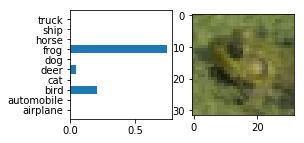

Predicted: deer
Correct: deer


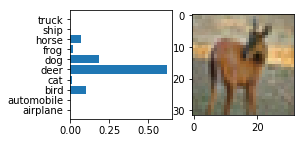

Predicted: airplane
Correct: airplane


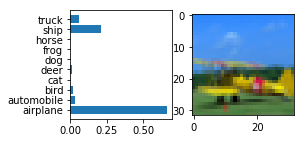

In [71]:
import numpy as np

for i in random.sample(range(1,100), 4):    
    pred = y_pred[i]
    pred_name = NAMES[np.argmax(pred)]
    correct_name = NAMES[int(y_test_class[i])]
    print(f'Predicted: {pred_name}')
    print(f'Correct: {correct_name}')

    fig = plt.figure(figsize=(4, 2))
    fig.add_subplot(1, 2, 1)
    plt.barh(np.arange(len(pred)), pred, tick_label=NAMES)

    fig.add_subplot(1, 2, 2)
    plt.imshow(X_test[i])
    plt.show()

In [0]:
MODEL_NAME = '/content/saved_models/CIFAR.model'

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [79]:
# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save(MODEL_NAME)
model_file = drive.CreateFile({'title' : MODEL_NAME})
model_file.SetContentFile(MODEL_NAME)
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1yflaJnBsbw3Zu3u7wID7d_qfPjTnSoPx'})